![header](images/header.png)

# Initialization run
<!-- [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ec-jrc/lisflood-usecases/mekong_usecase?urlpath=%2Fdoc%2Ftree%2FLF_mekong_usecase%2Fdocs%2Fnotebooks%2F) -->

<br>
<br>
<br>

The purpose of the initialization run is to estimate two rate variables required for the model initialization:

* `avgdis.nc`:  a map of the average discharge in the river network.
* `lzavin.nc`: a map of the average inflow into the lower groundwater zone.

We will save these outputs in a specific subfolder (`initial`) within the project folder, so we can use them it the succeeding runs.

> **Note**. A thorough explanation on the importance of the model initialization can be found in this section of the [User Guide](https://ec-jrc.github.io/lisflood-code/3_step5_model-initialisation/).

In [1]:
from pathlib import Path

import xarray as xr
import matplotlib.pyplot as plt

path_model = Path('../LF_mekong_usecase')
path_init = path_model / 'results' / 'initial'

## 1 Settings file

In the following lines, a snippet of the settings file ([`settings_initialization.xml`](../LF_mekong_usecase/settings_initialization.xml)) shows the most relevant lines to configure the initializatin run.

```xml
<lfoptions>
    
    # [...]
    
    <setoption choice="1" name="InitLisflood"/>
    <setoption choice="0" name="InitLisfloodwithoutsplit"/>
    
    # [...]
    
</lfoptions>

<lfuser>
    
    # GENERAL SETUP
    
    # [...]
    
    # time-related variables
    <textvar name="CalendarDayStart" value="02-01-1979 00:00"/>
    <textvar name="StepStart" value="02-01-1979 00:00"/>
    <textvar name="StepEnd" value="01-01-2020 00:00"/>
    <textvar name="timestepInit" value="1"/>
    <textvar name="DtSec" value="86400"/>
    <textvar name="DtSecChannel" value="14400"/>
    
    # paths where the results will be saved
    <textvar name="PathInit" value="$(PathRoot)/results/initial"/>
    <textvar name="LZAvInflowMap" value="$(PathInit)/lzavin"/>
    <textvar name="AvgDis" value="$(PathInit)/avgdis"/>
    
    # [...]
    
    # INITIAL CONDITIONS
    
    # water balance
    <textvar name="OFDirectInitValue" value="0"/>
    <textvar name="OFOtherInitValue" value="0"/>
    [...]
    
    # channels
    <textvar name="TotalCrossSectionAreaInitValue" value="-9999"/>
    <textvar name="CrossSection2AreaInitValue" value="-9999"/>
    <textvar name="PrevSideflowInitValue" value="-9999"/>
    <textvar name="PrevDischarge" value="-9999"/>
    
    # reservoirs
    <textvar name="ReservoirInitialLevelValue" value="-9999"/>
    
    # lakes (if simulateLakes = 1)
    <textvar name="LakeInitialLevelValue" value="-9999"/>
    <textvar name="LakePrevInflowValue" value="-9999"/>
    <textvar name="LakePrevOutflowValue" value="-9999"/>   
    
    # soils
    <textvar name="ThetaInit1Value" value="-9999"/>
    <textvar name="ThetaInit2Value" value="-9999"/>
    <textvar name="ThetaInit3Value" value="-9999"/>
    <textvar name="LZInitValue" value="-9999"/>
    [...]
    
</lfuser>
```

* In the section `<lfoptions>`:
    * The option `InitLisflood` tells LISFLOOD that this run is an initialization. 
    * Since we are using as a routing module the split kinematic wave, we must deactivate the option `InitLisfloodwithoutsplit`; otherwise, the initialization run will not produce the file `avgdis.nc` and we will not be able to initialize the routing module in succeeding runs. 
* In the section `<lfuser>`, we must define the simulation period, the location of the output files, and the initial conditions.
    * The initialization run spans from 01-01-1979 to 31-12-2019. Following the [end of timestep time convention](https://ec-jrc.github.io/lisflood-code/2_ESSENTIAL_time-management/) in LISFLOOD, the previous dates will be shifted forward by 1 day; that's why in the settings file the `StepStart` and `StepEnd` are 02-01-1979 and 01-01-2020, respectively. 
    * We will save the two ouput files (`lzavin.nc` and `avgdis.nc`) in a folder named _initial_. It is not necessary to specify the extension of the NetCDF files.
    * Regarding the initial conditions, those in the section water balance must be initialized with a value or a map (we define default values of 0 or 1), whereas the rest of the variables can be internally initialized by setting the value -9999.
    

## 2 Run the simulation

To run the simulation, open a terminal, activate the Conda environment where you have installed LISFLOOD and execute the `lisflood` function pointing at the appropriate settings file. For instance:

```shell
conda activate <your_lisflood_environment>
cd <path_where_you_saved_the_repository>/lisflood-usecases
lisflood LF_mekong_usecase/settings_initialization.xml
```

## 3 Outputs

The outputs are the two maps (in NetCDF format) mentioned at the top of this notebook. In the settings file, we set that these files must be saved in the `initial` subfolder. Let's load them and inspect them:

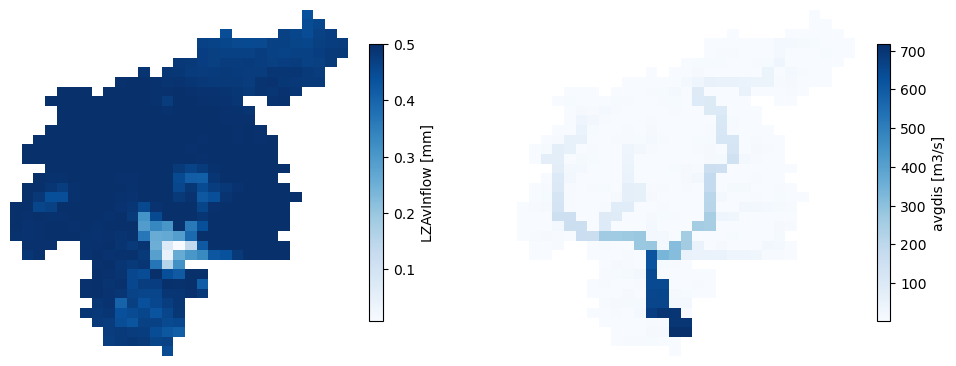

In [2]:
# load average inflow into the lower groundware zone
lzavin = xr.open_dataarray(path_init / 'lzavin.nc')
lzavin.close()

# load average discharge
avgdis = xr.open_dataarray(path_init / 'avgdis.nc')
avgdis.close()

# plot the maps
fig, axes = plt.subplots(ncols=2, figsize=(12, 4.5))
for ax, da in zip(axes, [lzavin, avgdis]):
    da.plot(ax=ax, cmap='Blues', cbar_kwargs={'shrink': 0.8})
    ax.axis('off')

***Figure 1**. Output maps of the initialization run.*

Both outputs represent an average flow rate, therefore, they are a single map with no temporal dimension.